# E-Commerce - Users and Orders EMEA
## Data Cleaning

"TheLook is a fictitious eCommerce clothing site developed by the Looker team. The dataset contains information about customers, products, orders, logistics, web events and digital marketing campaigns. The contents of this dataset are synthetic, and are provided to industry practitioners for the purpose of product discovery, testing, and evaluation."

Not all information will be subject in this project. The further analysis will be conducted based on the following query.

The data frame contains information about registered users of the fictional E-commerce store.
If a user made a purchase the data frame will also list information about the respective order.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone

In [2]:
df = pd.read_csv('../data/raw/ecommerce_users_orders_europe.csv')


In [3]:
df.head()

,user_id,first_name,last_name,age,gender,state,street_address,postal_code,city,country,registered_on,user_traffic_source,order_id,order_status,order_created_at,num_of_item,revenue
0,30231,Michael,Burch,25,M,Andalucía,40146 Ferguson Road,4117,San Isidro de Níjar,Spain,2019-08-04 17:10:00 UTC,Search,NaN,NaN,NaN,NaN,NaN
1,63740,Ryan,Munoz,41,M,Andalucía,577 Laurie Stravenue,4117,San Isidro de Níjar,Spain,2023-02-16 00:23:00 UTC,Search,79733.0,Cancelled,2023-07-05 00:23:00 UTC,1.0,89.989998
2,81229,Bradley,Gomez,30,M,Andalucía,61977 Sara Neck,4117,San Isidro de Níjar,Spain,2021-10-30 06:51:00 UTC,Organic,101551.0,Cancelled,2022-04-25 06:51:00 UTC,2.0,29.980000
3,83889,Jennifer,Morgan,52,F,Andalucía,248 Murphy Parkway Apt. 083,4100,Campohermoso,Spain,2020-03-31 17:12:00 UTC,Organic,104928.0,Cancelled,2021-10-27 17:12:00 UTC,1.0,30.209999
4,83889,Jennifer,Morgan,52,F,Andalucía,248 Murphy Parkway Apt. 083,4100,Campohermoso,Spain,2020-03-31 17:12:00 UTC,Organic,104927.0,Processing,2023-08-03 17:12:00 UTC,1.0,30.209999


In [4]:
df.describe()

,user_id,age,order_id,num_of_item,revenue
count,27734.000000,27734.000000,23837.000000,23837.000000,23837.000000
mean,49949.081885,41.000108,62282.122583,1.450854,177.780300
std,28767.217681,17.066364,35952.180017,0.809142,163.481417
min,18.000000,12.000000,19.000000,1.000000,0.490000
25%,25049.500000,26.000000,31024.000000,1.000000,59.020002
50%,49914.500000,41.000000,62263.000000,1.000000,130.450001
75%,74803.250000,56.000000,93348.000000,2.000000,246.480007
max,99999.000000,70.000000,124831.000000,4.000000,1308.989998


In [5]:
df.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'gender', 'state',
       'street_address', 'postal_code', 'city', 'country', 'registered_on',
       'user_traffic_source', 'order_id', 'order_status', 'order_created_at',
       'num_of_item', 'revenue'],
      dtype='object')

In [6]:
df.dtypes

user_id                  int64
first_name              object
last_name               object
age                      int64
gender                  object
state                   object
street_address          object
postal_code             object
city                    object
country                 object
registered_on           object
user_traffic_source     object
order_id               float64
order_status            object
order_created_at        object
num_of_item            float64
revenue                float64
dtype: object

In [7]:
# first convert the date columns to datetime
date_cols = ['registered_on', 'order_created_at']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], origin='unix', format='mixed', utc=True)

In [8]:
# the id columns need to be object
df[['user_id', 'order_id']] = df[['user_id', 'order_id']].astype(object)
df.dtypes

user_id                             object
first_name                          object
last_name                           object
age                                  int64
gender                              object
state                               object
street_address                      object
postal_code                         object
city                                object
country                             object
registered_on          datetime64[ns, UTC]
user_traffic_source                 object
order_id                            object
order_status                        object
order_created_at       datetime64[ns, UTC]
num_of_item                        float64
revenue                            float64
dtype: object

In [9]:
for_unique_check = ['age', 'gender', 'state', 'country',
                    'user_traffic_source', 'order_status', 'num_of_item']

for col in for_unique_check:
    print(col)
    print(df[col].unique())

age
[25 41 30 52 50 60 44 57 69 53 47 12 54 14 32 38 62 17 65 68 22 27 58 18
 36 26 59 29 61 35 64 42 28 34 66 55 39 20 24 21 16 40 19 70 15 67 43 56
 31 48 23 33 45 13 37 51 46 49 63]
gender
['M' 'F']
state
['Andalucía' 'Aragón' 'Auvergne-Rhône-Alpes' 'Baden-Württemberg' 'Bayern'
 'Berlin' 'Bourgogne-Franche-Comté' 'Brandenburg' 'Bremen' 'Bretagne'
 'Brussels' 'Canarias' 'Cantabria' 'Castilla y León' 'Castilla-La Mancha'
 'Cataluña' 'Centre-Val de Loire' 'Ceuta' 'Comunidad Valenciana'
 'Comunidad de Madrid' 'Corse' 'Dolnośląskie' 'England' 'Extremadura'
 'Flanders' 'Galicia' 'Grand Est' 'Hamburg' 'Hauts-de-France' 'Hessen'
 'Islas Baleares' 'La Rioja' 'Lubuskie' 'Mecklenburg-Vorpommern' 'Melilla'
 'Navarra' 'Niedersachsen' 'Nordrhein-Westfalen' 'Normandie'
 'Northern Ireland' 'Nouvelle-Aquitaine' 'Occitanie' 'Pays de la Loire'
 'País Vasco' 'Principado de Asturias' "Provence-Alpes-Côte d'Azur"
 'Región de Murcia' 'Rheinland-Pfalz' 'Saarland' 'Sachsen'
 'Sachsen-Anhalt' 'Schleswig-Hols

In [10]:
# clean country: 'España' -> 'Spain'
df['country'].replace('España', 'Spain', inplace=True)

In [11]:
df.isnull().sum()

user_id                   0
first_name                0
last_name                 0
age                       0
gender                    0
state                     0
street_address            0
postal_code               0
city                     77
country                   0
registered_on             0
user_traffic_source       0
order_id               3897
order_status           3897
order_created_at       3897
num_of_item            3897
revenue                3897
dtype: int64

There are missing values in the city column. 
Further, 3897 users haven't ordered on the platform yet. This information (rows) can be useful later on for creating prediction models. Therefore, I will split the df into two parts: one containing users with orders, and the other with users that haven't made an order yet.

In [12]:
#Let's have a look at the nans in the city column
df[df['city'].isna()][['postal_code','country']].value_counts()

postal_code  country
30835        Spain      12
50059        Spain       9
15174        Spain       7
28946        Spain       7
41130        Spain       7
50016        Spain       6
29140        Spain       6
33129        Germany     5
50197        Spain       5
38300        Spain       3
28947        Spain       2
46988        Spain       2
25191        Spain       1
38434        Spain       1
28909        Spain       1
28524        Spain       1
50191        Spain       1
38297        Spain       1
Name: count, dtype: int64

Either could webscrap the postal codes or just drop the rows.
I will look up the Germany postal code and fill the city manually.

In [13]:
missing_city_ger = {'33129': "Delbrück"}
df['city'] = df['city'].fillna(df['postal_code'].map(missing_city_ger))

In [14]:
zipcode_nan_cities = df[df['city'].isna()]['postal_code'].drop_duplicates().tolist()

In [15]:
#checking if there is an entry with these postal codes
df[(df['postal_code'].isin(zipcode_nan_cities)) & (df['city'].notna()) & (df['country'] == "Spain")]

,user_id,first_name,last_name,age,gender,state,street_address,postal_code,city,country,registered_on,user_traffic_source,order_id,order_status,order_created_at,num_of_item,revenue


In [16]:
df[(df['user_id']==5251)]

,user_id,first_name,last_name,age,gender,state,street_address,postal_code,city,country,registered_on,user_traffic_source,order_id,order_status,order_created_at,num_of_item,revenue
15833,5251,Heather,Martinez,33,F,Galicia,15864 Amber Port,15174,NaN,Spain,2021-04-07 18:59:00+00:00,Search,6474.0,Cancelled,2022-07-23 18:59:00+00:00,1.0,131.740003
15834,5251,Heather,Martinez,33,F,Galicia,15864 Amber Port,15174,NaN,Spain,2021-04-07 18:59:00+00:00,Search,6473.0,Processing,2023-05-25 18:59:00+00:00,1.0,131.740003
15835,5251,Heather,Martinez,33,F,Galicia,15864 Amber Port,15174,NaN,Spain,2021-04-07 18:59:00+00:00,Search,6476.0,Returned,2022-10-17 18:59:00+00:00,1.0,131.740003
15836,5251,Heather,Martinez,33,F,Galicia,15864 Amber Port,15174,NaN,Spain,2021-04-07 18:59:00+00:00,Search,6475.0,Shipped,2021-05-22 18:59:00+00:00,1.0,131.740003


In [17]:
df = df.dropna(subset=['city'])

Either could webscrap the postal codes or just drop the rows.

In [18]:
df.shape

(27662, 17)

In [19]:
#look for duplicate data
df.duplicated().sum()

0

In [20]:
# let's define since when the users are registered (in days)
reference_date = datetime.utcnow().replace(tzinfo=timezone.utc)
df['days_since_registration'] = (reference_date - df['registered_on']).dt.days
df[['registered_on','days_since_registration']].head()

,registered_on,days_since_registration
0,2019-08-04 17:10:00+00:00,1638
1,2023-02-16 00:23:00+00:00,347
2,2021-10-30 06:51:00+00:00,821
3,2020-03-31 17:12:00+00:00,1398
4,2020-03-31 17:12:00+00:00,1398


In [21]:
# investigating the data set and the user order behaviour
pivot_table = pd.pivot_table(df, index='user_id', values='order_id', aggfunc='count', fill_value=0)

# Display the pivot table to inspect the number of orders by user

min_orders_value = pivot_table.min()['order_id']
max_orders_value = pivot_table.max()['order_id']

print(f"Number of min orders: {min_orders_value}")
print(f"Number of max orders: {max_orders_value}")

Number of min orders: 0
Number of max orders: 4


In [22]:
df.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'gender', 'state',
       'street_address', 'postal_code', 'city', 'country', 'registered_on',
       'user_traffic_source', 'order_id', 'order_status', 'order_created_at',
       'num_of_item', 'revenue', 'days_since_registration'],
      dtype='object')

In [23]:
# split data set in users with orders and users without orders
# prediction if order will be returned
# when user is ordering
# calculate rfm

In [24]:
df['user_id'].nunique()

19104

In [25]:
# Creating a Customer centered DataFrame
customer_df = df.groupby(['user_id', 'registered_on', 'age', 'gender', 'city', 'country']).agg({
    'order_created_at': ['min', 'max'],  # Min and Max for recency
    'order_id': 'nunique',                # Number of orders for frequency
    'num_of_item': 'mean',                # Average number of items of order
    'revenue': ['sum', 'mean']            # Total revenue of orders (CLV) and average revenugre
}).reset_index()

# Calculating the average days between orders
#customer_df['avg_days_between_orders'] = (customer_df['order_created_at']['max'] - customer_df['order_created_at']['min']).dt.total_seconds() / customer_df['order_id']['nunique'] / (60 * 60 * 24)

customer_df.columns = ['user_id', 'registration_date', 'age', 'gender', 'city',
                       'country', 'first_order_date', 'last_order_date', 
                       'total_orders', 'avg_order_items', 'total_revenue', 'avg_order_value']

In [26]:
# Sorting orders by user and order date
df_sorted = df.sort_values(['user_id', 'order_created_at'])

# Calculate the time difference between consecutive orders
df_sorted['time_diff'] = df_sorted.groupby('user_id')['order_created_at'].diff()

# Calculate the average days between orders for each customer
avg_days_between_orders = df_sorted.groupby('user_id')['time_diff'].mean().dt.days
avg_days_between_orders
# Merge the average days between orders into the customer_df DataFrame
customer_df = pd.merge(customer_df, avg_days_between_orders, left_on='user_id', right_index=True, how='left')

# Rename the column
customer_df = customer_df.rename(columns={'time_diff': 'avg_days_between_orders'})

customer_df

,user_id,registration_date,age,gender,city,country,first_order_date,last_order_date,total_orders,avg_order_items,total_revenue,avg_order_value,avg_days_between_orders
0,18,2020-06-18 10:15:00+00:00,31,M,Schwedt/Oder,Poland,2021-05-26 10:15:00+00:00,2021-05-26 10:15:00+00:00,1,1.0,46.990002,46.990002,NaN
1,20,2020-12-20 03:57:00+00:00,57,M,Castalla,Spain,NaT,NaT,0,NaN,0.000000,NaN,NaN
2,29,2023-09-22 07:18:00+00:00,23,M,Pudsey,United Kingdom,2023-11-29 07:18:00+00:00,2023-11-29 07:18:00+00:00,1,2.0,65.680000,65.680000,NaN
3,30,2020-02-18 07:06:00+00:00,36,F,Fréjus,France,NaT,NaT,0,NaN,0.000000,NaN,NaN
4,33,2019-02-14 17:19:00+00:00,12,M,Bogatynia,Poland,2020-06-02 17:19:00+00:00,2020-06-11 17:19:00+00:00,2,1.0,73.959999,36.980000,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,99980,2023-06-03 09:55:00+00:00,23,F,Boussu,Belgium,NaT,NaT,0,NaN,0.000000,NaN,NaN
19100,99982,2020-02-02 12:23:00+00:00,62,F,Madrid,Spain,2020-06-18 12:23:00+00:00,2022-01-03 12:23:00+00:00,2,1.0,383.900002,191.950001,564.0
19101,99989,2019-12-26 18:26:00+00:00,34,M,Badajoz,Spain,2020-01-03 18:26:00+00:00,2020-01-03 18:26:00+00:00,1,1.0,17.799999,17.799999,NaN
19102,99997,2023-07-21 12:30:00+00:00,48,M,Malle,Belgium,2023-10-29 12:30:00+00:00,2023-10-29 12:30:00+00:00,1,1.0,12.950000,12.950000,NaN


In [27]:
customer_df[customer_df['first_order_date'] <= reference_date]

,user_id,registration_date,age,gender,city,country,first_order_date,last_order_date,total_orders,avg_order_items,total_revenue,avg_order_value,avg_days_between_orders
0,18,2020-06-18 10:15:00+00:00,31,M,Schwedt/Oder,Poland,2021-05-26 10:15:00+00:00,2021-05-26 10:15:00+00:00,1,1.0,46.990002,46.990002,NaN
2,29,2023-09-22 07:18:00+00:00,23,M,Pudsey,United Kingdom,2023-11-29 07:18:00+00:00,2023-11-29 07:18:00+00:00,1,2.0,65.680000,65.680000,NaN
4,33,2019-02-14 17:19:00+00:00,12,M,Bogatynia,Poland,2020-06-02 17:19:00+00:00,2020-06-11 17:19:00+00:00,2,1.0,73.959999,36.980000,9.0
6,49,2023-04-11 02:46:00+00:00,62,M,Bailleul,France,2023-08-20 02:46:00+00:00,2023-08-20 02:46:00+00:00,1,1.0,65.000000,65.000000,NaN
7,50,2023-05-01 13:46:00+00:00,15,F,Linares,Spain,2023-07-10 13:46:00+00:00,2023-09-27 13:46:00+00:00,2,1.5,512.740005,256.370003,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19096,99962,2020-10-10 15:32:00+00:00,49,F,Torremolinos,Spain,2022-07-23 15:32:00+00:00,2023-01-21 15:32:00+00:00,3,1.0,347.940004,115.980001,91.0
19100,99982,2020-02-02 12:23:00+00:00,62,F,Madrid,Spain,2020-06-18 12:23:00+00:00,2022-01-03 12:23:00+00:00,2,1.0,383.900002,191.950001,564.0
19101,99989,2019-12-26 18:26:00+00:00,34,M,Badajoz,Spain,2020-01-03 18:26:00+00:00,2020-01-03 18:26:00+00:00,1,1.0,17.799999,17.799999,NaN
19102,99997,2023-07-21 12:30:00+00:00,48,M,Malle,Belgium,2023-10-29 12:30:00+00:00,2023-10-29 12:30:00+00:00,1,1.0,12.950000,12.950000,NaN


In [28]:
#lets focus on full years and plot the development
reference_date = pd.to_datetime('2023-12-31', utc=True)

#customer_df = customer_df[customer_df['registration_year'] != 2024]
customer_df_filtered = customer_df[customer_df['last_order_date'] <= reference_date]


customer_df_filtered['order_frequency_per_year'] = customer_df['total_orders'] / (reference_date - customer_df['first_order_date']).dt.total_seconds() / (60 * 60 * 24 * 30 *12)
customer_df_filtered['days_since_first_order'] = (reference_date - customer_df['first_order_date']).dt.total_seconds() / (60 * 60 * 24)
customer_df_filtered['days_since_last_order'] = (reference_date - customer_df['last_order_date']).dt.total_seconds() / (60 * 60 * 24)
customer_df_filtered['days_since_registration'] = (reference_date - customer_df['registration_date']).dt.total_seconds() / (60 * 60 * 24)
customer_df_filtered['days_until_first_order'] = (customer_df['first_order_date'] - customer_df['registration_date']).dt.total_seconds() / (60 * 60 * 24)

# as mentioned before, there are users that haven't ordered yet
customer_df_filtered['has_ordered'] = customer_df['first_order_date'].apply(lambda x: 0 if pd.isna(x) else 1)
display(customer_df_filtered.head())

/var/folders/xv/sbmlp5m11vlc8qbxx5xp1lfw0000gp/T/ipykernel_10938/4229618325.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df_filtered['order_frequency_per_year'] = customer_df['total_orders'] / (reference_date - customer_df['first_order_date']).dt.total_seconds() / (60 * 60 * 24 * 30 *12)
/var/folders/xv/sbmlp5m11vlc8qbxx5xp1lfw0000gp/T/ipykernel_10938/4229618325.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df_filtered['days_since_first_order'] = (reference_date - customer_df[

,user_id,registration_date,age,gender,city,country,first_order_date,last_order_date,total_orders,avg_order_items,total_revenue,avg_order_value,avg_days_between_orders,order_frequency_per_year,days_since_first_order,days_since_last_order,days_since_registration,days_until_first_order,has_ordered
0,18,2020-06-18 10:15:00+00:00,31,M,Schwedt/Oder,Poland,2021-05-26 10:15:00+00:00,2021-05-26 10:15:00+00:00,1,1.0,46.990002,46.990002,NaN,3.922828e-16,948.572917,948.572917,1290.572917,342.0,1
2,29,2023-09-22 07:18:00+00:00,23,M,Pudsey,United Kingdom,2023-11-29 07:18:00+00:00,2023-11-29 07:18:00+00:00,1,2.0,65.680000,65.680000,NaN,1.173999e-14,31.695833,31.695833,99.695833,68.0,1
4,33,2019-02-14 17:19:00+00:00,12,M,Bogatynia,Poland,2020-06-02 17:19:00+00:00,2020-06-11 17:19:00+00:00,2,1.0,73.959999,36.980000,9.0,5.697236e-16,1306.278472,1297.278472,1780.278472,474.0,1
6,49,2023-04-11 02:46:00+00:00,62,M,Bailleul,France,2023-08-20 02:46:00+00:00,2023-08-20 02:46:00+00:00,1,1.0,65.000000,65.000000,NaN,2.800238e-15,132.884722,132.884722,263.884722,131.0,1
7,50,2023-05-01 13:46:00+00:00,15,F,Linares,Spain,2023-07-10 13:46:00+00:00,2023-09-27 13:46:00+00:00,2,1.5,512.740005,256.370003,79.0,4.291260e-15,173.426389,94.426389,243.426389,70.0,1


In [29]:
customer_df_filtered[customer_df_filtered['days_since_last_order']<0]

,user_id,registration_date,age,gender,city,country,first_order_date,last_order_date,total_orders,avg_order_items,total_revenue,avg_order_value,avg_days_between_orders,order_frequency_per_year,days_since_first_order,days_since_last_order,days_since_registration,days_until_first_order,has_ordered


In [30]:
customer_df = customer_df_filtered

In [31]:
customer_df.dtypes

user_id                                   int64
registration_date           datetime64[ns, UTC]
age                                       int64
gender                                   object
city                                     object
country                                  object
first_order_date            datetime64[ns, UTC]
last_order_date             datetime64[ns, UTC]
total_orders                              int64
avg_order_items                         float64
total_revenue                           float64
avg_order_value                         float64
avg_days_between_orders                 float64
order_frequency_per_year                float64
days_since_first_order                  float64
days_since_last_order                   float64
days_since_registration                 float64
days_until_first_order                  float64
has_ordered                               int64
dtype: object

In [32]:
# the id columns need to be object
customer_df['user_id'] = customer_df['user_id'].astype(object)

/var/folders/xv/sbmlp5m11vlc8qbxx5xp1lfw0000gp/T/ipykernel_10938/3140444060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['user_id'] = customer_df['user_id'].astype(object)


In [33]:
print(customer_df.shape)

(13438, 19)


## Exploratory Data Analysis

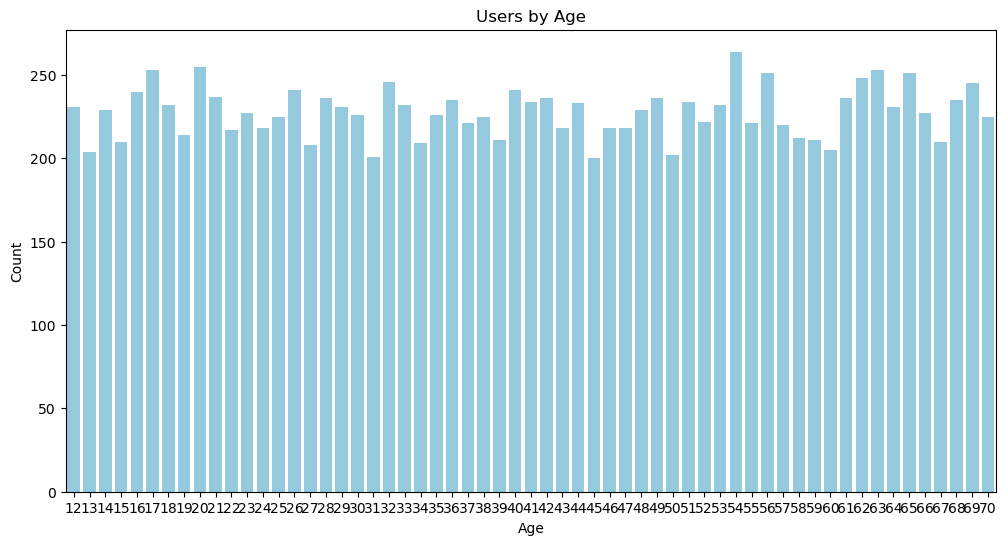

In [34]:
age_counts = customer_df['age'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, color='skyblue')
plt.title('Users by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [35]:
# Adding age groups:
bins = [0, 18, 30, 40, 50, 60, 70, 120]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71+']

customer_df['age_class'] = pd.cut(customer_df['age'], bins=bins, labels=labels, right=False)

/var/folders/xv/sbmlp5m11vlc8qbxx5xp1lfw0000gp/T/ipykernel_10938/462151789.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['age_class'] = pd.cut(customer_df['age'], bins=bins, labels=labels, right=False)


In [36]:
# Display the count of each age class
age_class_counts = customer_df['age_class'].value_counts().sort_index()
print(age_class_counts)

age_class
0-18     1367
19-30    2741
31-40    2232
41-50    2263
51-60    2269
61-70    2341
71+       225
Name: count, dtype: int64


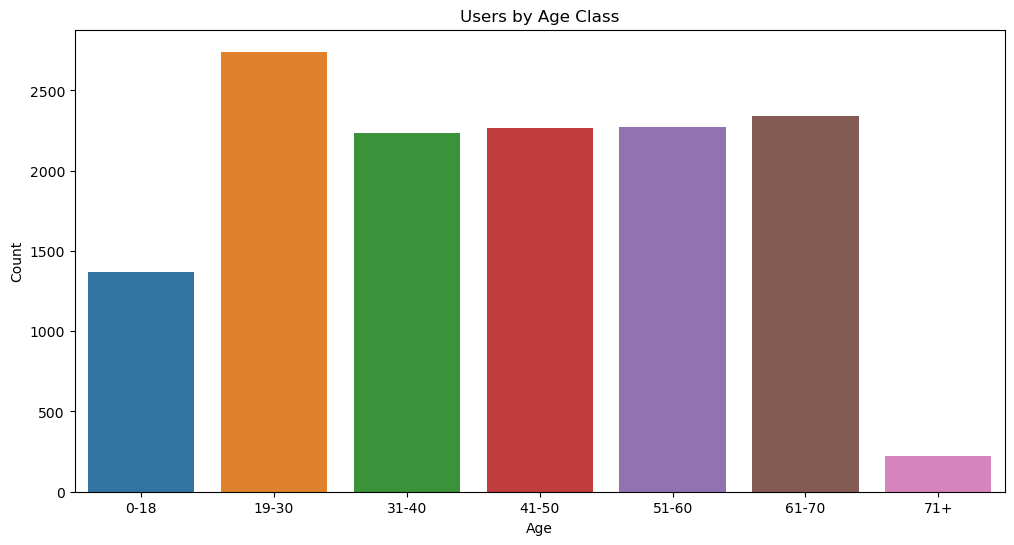

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(customer_df, x='age_class')
plt.title('Users by Age Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

gender
F    6727
M    6711
Name: count, dtype: int64


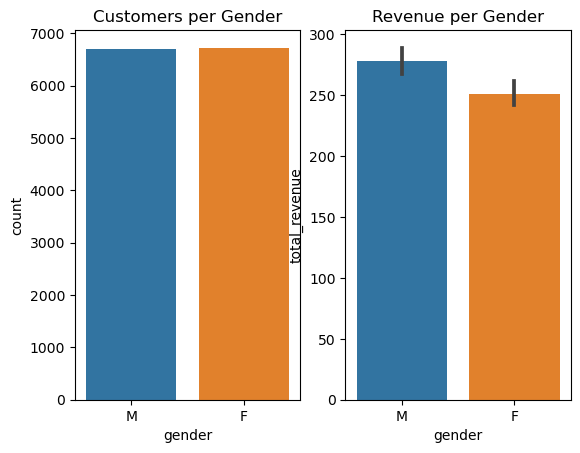

In [38]:
print(customer_df['gender'].value_counts())

fig, ax = plt.subplots(1,2)
sns.countplot(customer_df, x='gender', ax=ax[0]).set_title('Customers per Gender')
sns.barplot(customer_df, x='gender', y='total_revenue', ax=ax[1]).set_title('Revenue per Gender')
plt.show()

In [39]:
customer_df['registration_year'] = customer_df['registration_date'].dt.year
customer_df['registration_month'] = customer_df['registration_date'].dt.month

/var/folders/xv/sbmlp5m11vlc8qbxx5xp1lfw0000gp/T/ipykernel_10938/599286830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['registration_year'] = customer_df['registration_date'].dt.year
/var/folders/xv/sbmlp5m11vlc8qbxx5xp1lfw0000gp/T/ipykernel_10938/599286830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['registration_month'] = customer_df['registration_date'].dt.month


In [40]:
print(customer_df['registration_year'].value_counts())

registration_year
2020    2870
2021    2852
2019    2765
2022    2721
2023    2230
Name: count, dtype: int64


In [41]:
print(customer_df['registration_year'].value_counts())

registration_year
2020    2870
2021    2852
2019    2765
2022    2721
2023    2230
Name: count, dtype: int64


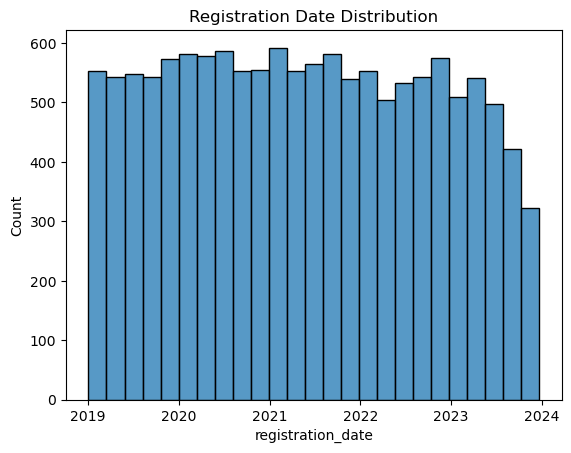

In [42]:
sns.histplot(customer_df, x='registration_date')
plt.title('Registration Date Distribution')
plt.ylabel('Count')
plt.show()

country
France            3348
United Kingdom    3317
Germany           2958
Spain             2764
Belgium            871
Poland             177
Austria              3
Name: count, dtype: int64


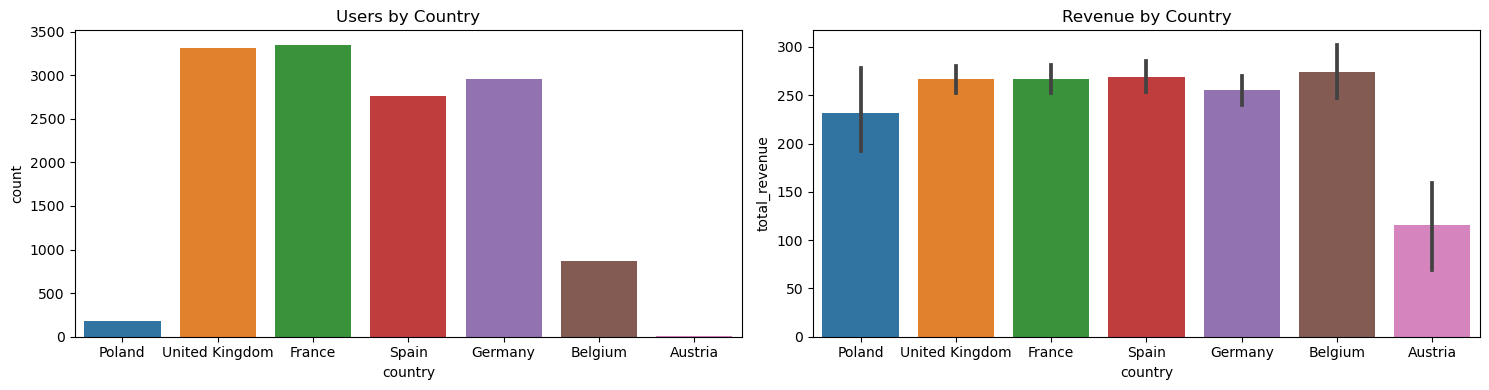

In [43]:
print(customer_df['country'].value_counts())

fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.countplot(customer_df, x='country', ax=ax[0]).set_title('Users by Country')
sns.barplot(customer_df, x='country', y='total_revenue', ax=ax[1]).set_title('Revenue by Country')
plt.tight_layout()
plt.show()

/Users/alinaaufenanger/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


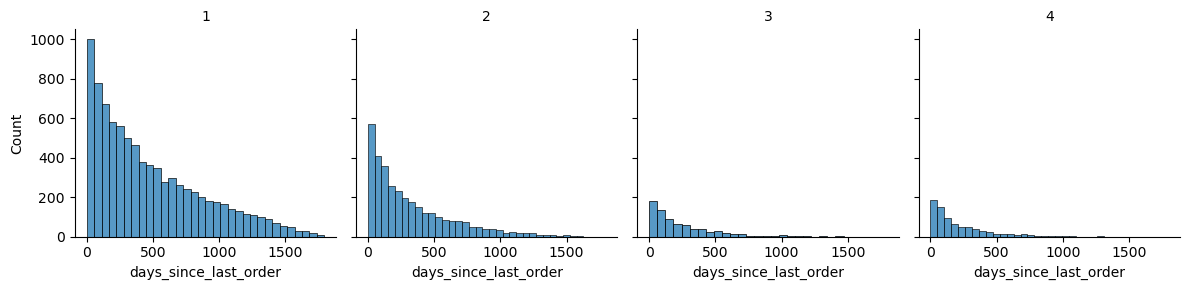

In [44]:
g = sns.FacetGrid(customer_df, col='total_orders', col_wrap=4)
g.map(sns.histplot, 'days_since_last_order')
g.set_titles('{col_name}')
plt.show()

Combining Violinplots and Boxplots:

Violin plots can be combined with boxplots to show both the summary statistics (boxplot) and the detailed distribution (violin plot) in the same visualization

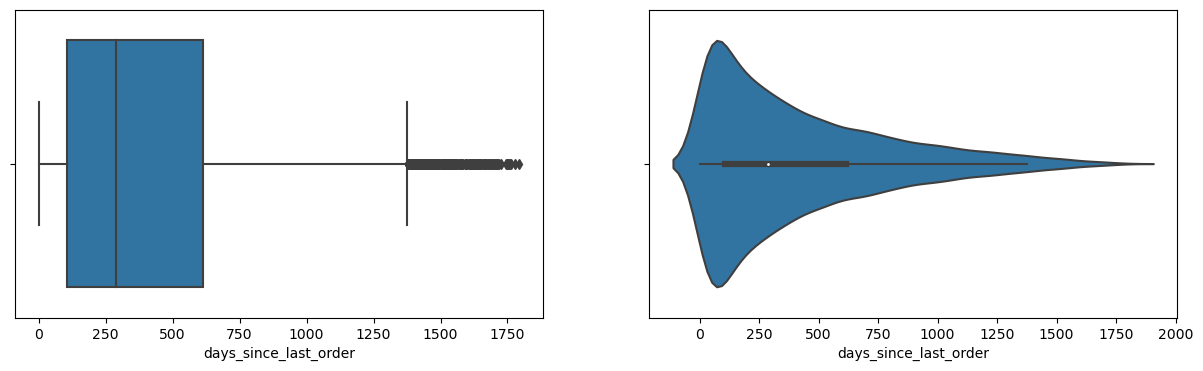

In [45]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.boxplot(customer_df, x='days_since_last_order', ax=ax[0])
sns.violinplot(customer_df, x='days_since_last_order', ax=ax[1])
plt.show()

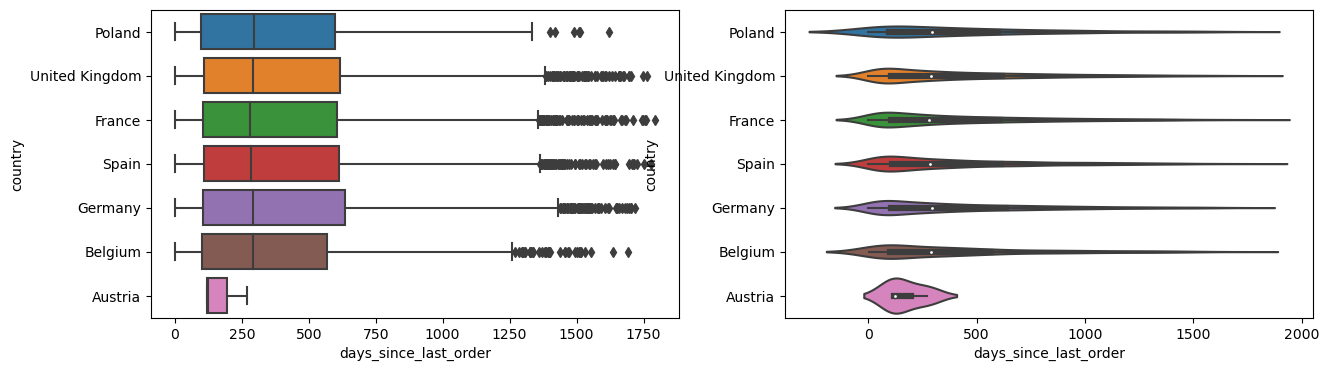

In [46]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.boxplot(customer_df, x='days_since_last_order', y='country', ax=ax[0])
sns.violinplot(customer_df, x='days_since_last_order', y='country', ax=ax[1])
plt.show()

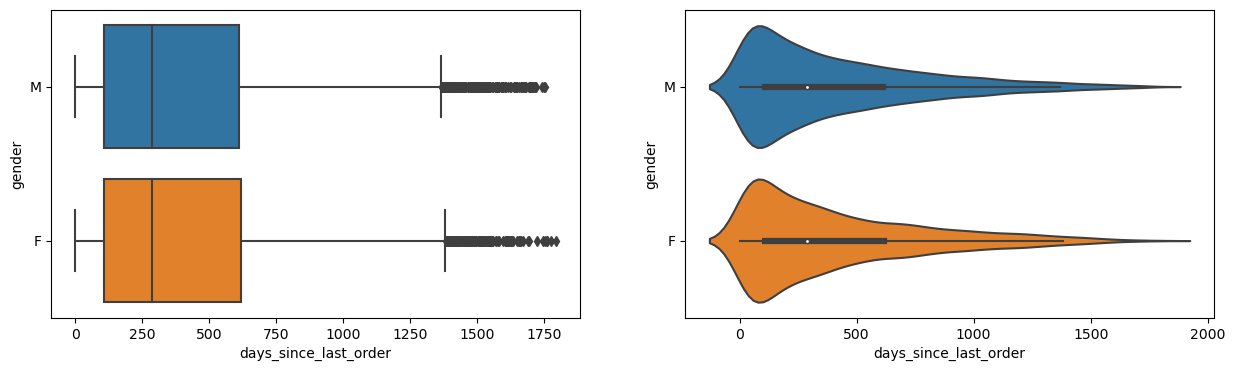

In [47]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.boxplot(customer_df, x='days_since_last_order', y='gender', ax=ax[0])
sns.violinplot(customer_df, x='days_since_last_order', y='gender', ax=ax[1])
plt.show()

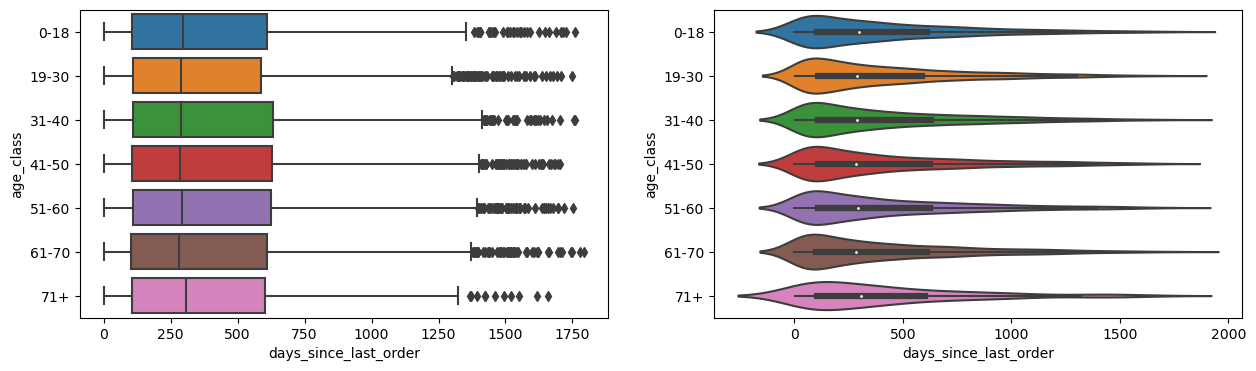

In [48]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.boxplot(customer_df, x='days_since_last_order', y='age_class', ax=ax[0])
sns.violinplot(customer_df, x='days_since_last_order', y='age_class', ax=ax[1])
plt.show()

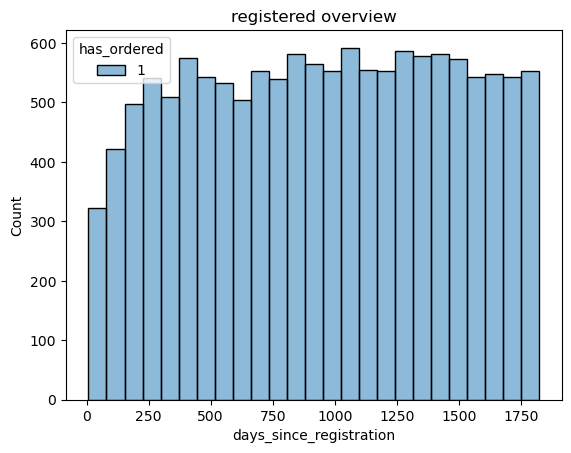

In [49]:
fig, ax = figsize=(15,5)
sns.histplot(customer_df, x='days_since_registration', hue='has_ordered').set_title('registered overview')
plt.show()

In [50]:
customer_df.columns

Index(['user_id', 'registration_date', 'age', 'gender', 'city', 'country',
       'first_order_date', 'last_order_date', 'total_orders',
       'avg_order_items', 'total_revenue', 'avg_order_value',
       'avg_days_between_orders', 'order_frequency_per_year',
       'days_since_first_order', 'days_since_last_order',
       'days_since_registration', 'days_until_first_order', 'has_ordered',
       'age_class', 'registration_year', 'registration_month'],
      dtype='object')

## Outlier Analysis

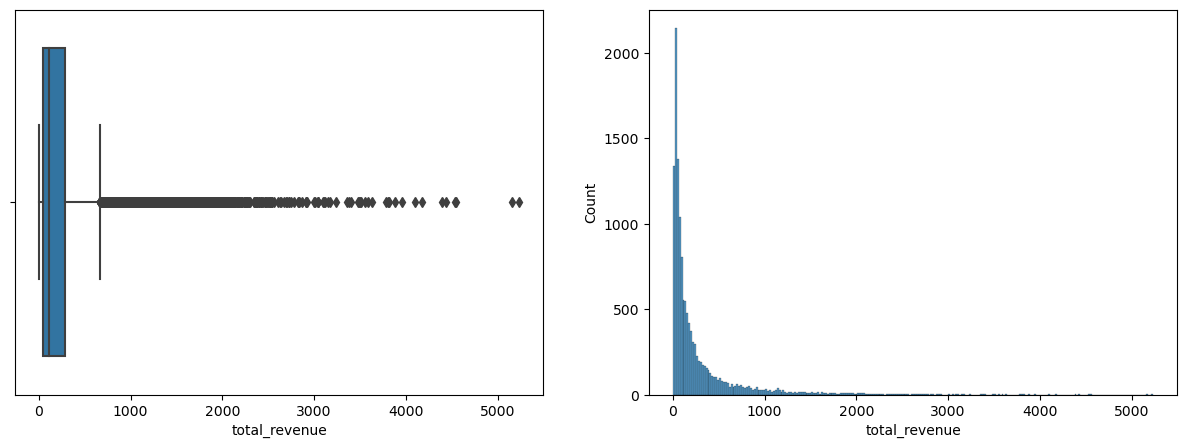

In [51]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(customer_df, x='total_revenue', ax=ax[0])
sns.histplot(customer_df, x='total_revenue', ax=ax[1])
plt.show()

<Axes: xlabel='total_revenue', ylabel='days_since_last_order'>

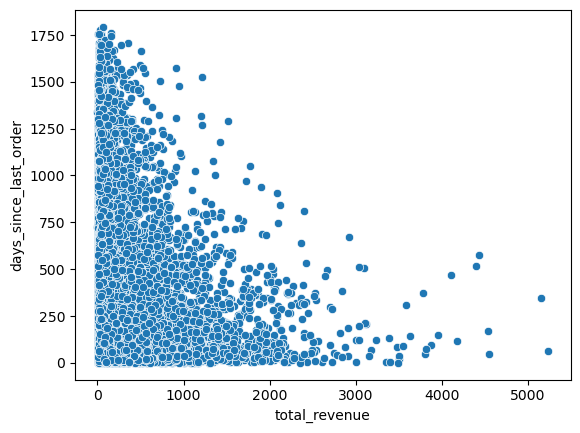

In [52]:
sns.scatterplot(customer_df, x='total_revenue', y='days_since_last_order')

In [53]:
#drop customers with total_revenue > 4000
customer_df = customer_df[customer_df['total_revenue'] <= 4000]

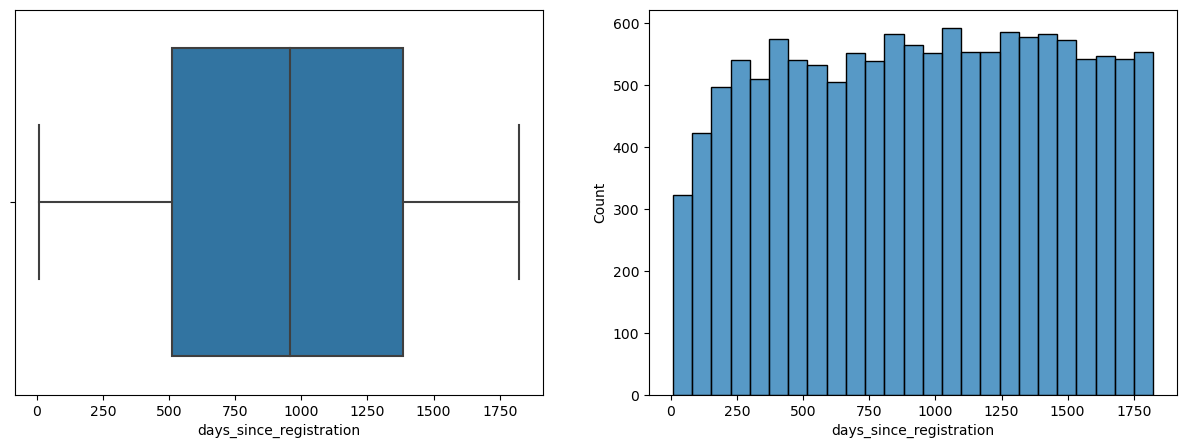

In [54]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(customer_df, x='days_since_registration', ax=ax[0])
sns.histplot(customer_df, x='days_since_registration', ax=ax[1])
plt.show()

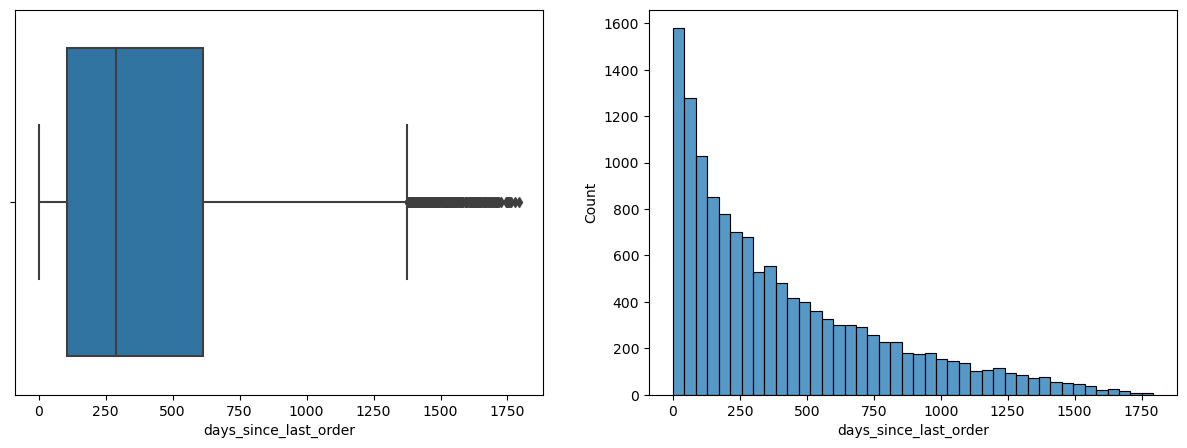

In [55]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(customer_df, x='days_since_last_order', ax=ax[0])
sns.histplot(customer_df, x='days_since_last_order', ax=ax[1])
plt.show()

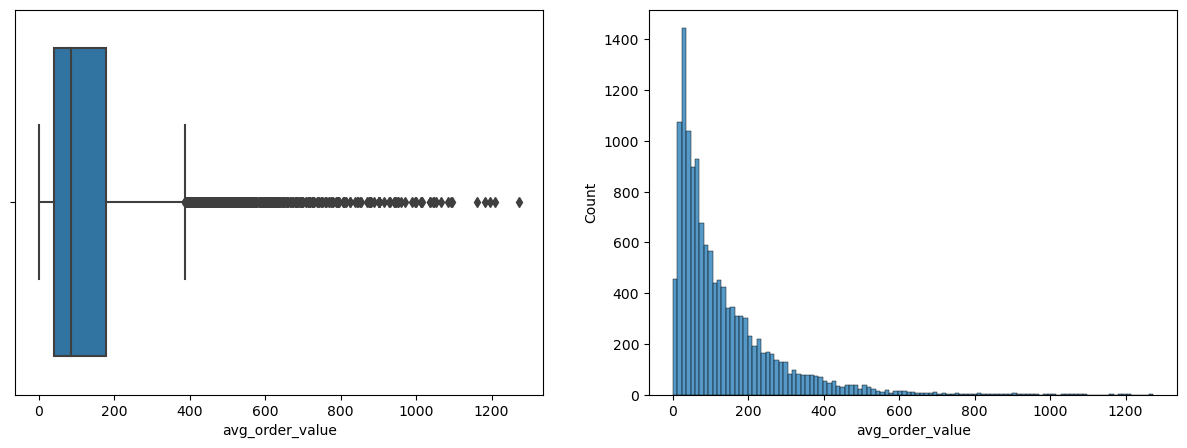

In [56]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(customer_df, x='avg_order_value', ax=ax[0])
sns.histplot(customer_df, x='avg_order_value', ax=ax[1])
plt.show()

In [57]:
users_with_orders = customer_df[(customer_df['first_order_date'].notnull())]
users_with_orders.drop(columns='has_ordered', inplace=True)
print(users_with_orders.shape)
print(users_with_orders.dtypes)
print(users_with_orders.isnull().sum())

(13430, 21)
user_id                                  object
registration_date           datetime64[ns, UTC]
age                                       int64
gender                                   object
city                                     object
country                                  object
first_order_date            datetime64[ns, UTC]
last_order_date             datetime64[ns, UTC]
total_orders                              int64
avg_order_items                         float64
total_revenue                           float64
avg_order_value                         float64
avg_days_between_orders                 float64
order_frequency_per_year                float64
days_since_first_order                  float64
days_since_last_order                   float64
days_since_registration                 float64
days_until_first_order                  float64
age_class                              category
registration_year                         int32
registration_month          

In [58]:
users_wo_orders = customer_df[(customer_df['first_order_date'].isna())]
users_wo_orders.shape

(0, 22)

In [59]:
users_wo_orders.isnull().sum()

user_id                     0.0
registration_date           0.0
age                         0.0
gender                      0.0
city                        0.0
country                     0.0
first_order_date            0.0
last_order_date             0.0
total_orders                0.0
avg_order_items             0.0
total_revenue               0.0
avg_order_value             0.0
avg_days_between_orders     0.0
order_frequency_per_year    0.0
days_since_first_order      0.0
days_since_last_order       0.0
days_since_registration     0.0
days_until_first_order      0.0
has_ordered                 0.0
age_class                   0.0
registration_year           0.0
registration_month          0.0
dtype: float64

In [60]:
users_wo_orders.dropna(axis=1, inplace=True)
display(users_wo_orders.head())
users_wo_orders.shape

/var/folders/xv/sbmlp5m11vlc8qbxx5xp1lfw0000gp/T/ipykernel_10938/3636319674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_wo_orders.dropna(axis=1, inplace=True)


,user_id,registration_date,age,gender,city,country,first_order_date,last_order_date,total_orders,avg_order_items,...,avg_days_between_orders,order_frequency_per_year,days_since_first_order,days_since_last_order,days_since_registration,days_until_first_order,has_ordered,age_class,registration_year,registration_month


(0, 22)

## Feature Analysis

In [95]:
#drop customers with that haven't been active since 3 years
users_with_orders = users_with_orders[users_with_orders['days_since_last_order'] <= (365*3)]

In [97]:
users_with_orders['avg_days_between_orders'].fillna(0,inplace=True)
users_with_orders.head()

,user_id,registration_date,age,gender,city,country,first_order_date,last_order_date,total_orders,avg_order_items,...,avg_order_value,avg_days_between_orders,order_frequency_per_year,days_since_first_order,days_since_last_order,days_since_registration,days_until_first_order,age_class,registration_year,registration_month
0,18,2020-06-18 10:15:00+00:00,31,M,Schwedt/Oder,Poland,2021-05-26 10:15:00+00:00,2021-05-26 10:15:00+00:00,1,1.0,...,46.990002,0.0,3.922828e-16,948.572917,948.572917,1290.572917,342.0,31-40,2020,6
2,29,2023-09-22 07:18:00+00:00,23,M,Pudsey,United Kingdom,2023-11-29 07:18:00+00:00,2023-11-29 07:18:00+00:00,1,2.0,...,65.680000,0.0,1.173999e-14,31.695833,31.695833,99.695833,68.0,19-30,2023,9
6,49,2023-04-11 02:46:00+00:00,62,M,Bailleul,France,2023-08-20 02:46:00+00:00,2023-08-20 02:46:00+00:00,1,1.0,...,65.000000,0.0,2.800238e-15,132.884722,132.884722,263.884722,131.0,61-70,2023,4
7,50,2023-05-01 13:46:00+00:00,15,F,Linares,Spain,2023-07-10 13:46:00+00:00,2023-09-27 13:46:00+00:00,2,1.5,...,256.370003,79.0,4.291260e-15,173.426389,94.426389,243.426389,70.0,0-18,2023,5
8,51,2019-07-11 00:19:00+00:00,66,M,Siegen,Germany,2021-08-15 00:19:00+00:00,2021-08-15 00:19:00+00:00,1,1.0,...,120.000000,0.0,4.287034e-16,867.986806,867.986806,1633.986806,766.0,61-70,2019,7


In [98]:
users_wo_orders.head()
#drop users that registered but still haven't been ordered after 3 years
users_wo_orders = users_wo_orders[users_wo_orders['days_since_registration'] <= (365*3)]

In [99]:
all_users = pd.concat([users_with_orders, users_wo_orders]).reset_index()
all_users.drop(columns=['first_order_date', 'last_order_date'], inplace=True)
all_users

,index,user_id,registration_date,age,gender,city,country,total_orders,avg_order_items,total_revenue,...,avg_days_between_orders,order_frequency_per_year,days_since_first_order,days_since_last_order,days_since_registration,days_until_first_order,age_class,registration_year,registration_month,has_ordered
0,0,18,2020-06-18 10:15:00+00:00,31,M,Schwedt/Oder,Poland,1,1.0,46.990002,...,0.0,3.922828e-16,948.572917,948.572917,1290.572917,342.0,31-40,2020,6,NaN
1,2,29,2023-09-22 07:18:00+00:00,23,M,Pudsey,United Kingdom,1,2.0,65.680000,...,0.0,1.173999e-14,31.695833,31.695833,99.695833,68.0,19-30,2023,9,NaN
2,6,49,2023-04-11 02:46:00+00:00,62,M,Bailleul,France,1,1.0,65.000000,...,0.0,2.800238e-15,132.884722,132.884722,263.884722,131.0,61-70,2023,4,NaN
3,7,50,2023-05-01 13:46:00+00:00,15,F,Linares,Spain,2,1.5,512.740005,...,79.0,4.291260e-15,173.426389,94.426389,243.426389,70.0,0-18,2023,5,NaN
4,8,51,2019-07-11 00:19:00+00:00,66,M,Siegen,Germany,1,1.0,120.000000,...,0.0,4.287034e-16,867.986806,867.986806,1633.986806,766.0,61-70,2019,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12469,19095,99951,2020-06-02 10:28:00+00:00,16,F,Caerphilly,United Kingdom,1,1.0,46.000000,...,0.0,5.427778e-16,685.563889,685.563889,1306.563889,621.0,0-18,2020,6,NaN
12470,19096,99962,2020-10-10 15:32:00+00:00,49,F,Torremolinos,Spain,3,1.0,347.940004,...,91.0,2.124909e-15,525.352778,343.352778,1176.352778,651.0,41-50,2020,10,NaN
12471,19100,99982,2020-02-02 12:23:00+00:00,62,F,Madrid,Spain,2,1.0,383.900002,...,564.0,5.766966e-16,1290.484028,726.484028,1427.484028,137.0,61-70,2020,2,NaN
12472,19102,99997,2023-07-21 12:30:00+00:00,48,M,Malle,Belgium,1,1.0,12.950000,...,0.0,5.955727e-15,62.479167,62.479167,162.479167,100.0,41-50,2023,7,NaN


In [100]:
all_users.columns

Index(['index', 'user_id', 'registration_date', 'age', 'gender', 'city',
       'country', 'total_orders', 'avg_order_items', 'total_revenue',
       'avg_order_value', 'avg_days_between_orders',
       'order_frequency_per_year', 'days_since_first_order',
       'days_since_last_order', 'days_since_registration',
       'days_until_first_order', 'age_class', 'registration_year',
       'registration_month', 'has_ordered'],
      dtype='object')

In [101]:
all_users['avg_order_items'].fillna(0,inplace=True)
all_users['avg_order_value'].fillna(0,inplace=True)
all_users['order_frequency_per_year'].fillna(0,inplace=True)
all_users['days_since_first_order'].fillna(0,inplace=True)
all_users['days_since_last_order'].fillna(0,inplace=True)
all_users['days_until_first_order'].fillna(0,inplace=True)

In [102]:
all_users['has_ordered'].fillna(1,inplace=True)

In [103]:
all_users['avg_days_between_orders'].fillna(0,inplace=True)

In [104]:
all_users.drop(columns="index",inplace=True)

In [105]:
all_users.dtypes

user_id                                  object
registration_date           datetime64[ns, UTC]
age                                       int64
gender                                   object
city                                     object
country                                  object
total_orders                              int64
avg_order_items                         float64
total_revenue                           float64
avg_order_value                         float64
avg_days_between_orders                 float64
order_frequency_per_year                float64
days_since_first_order                  float64
days_since_last_order                   float64
days_since_registration                 float64
days_until_first_order                  float64
age_class                              category
registration_year                         int32
registration_month                        int32
has_ordered                             float64
dtype: object

In [106]:
users_with_orders.isnull().sum()

user_id                     0
registration_date           0
age                         0
gender                      0
city                        0
country                     0
first_order_date            0
last_order_date             0
total_orders                0
avg_order_items             0
total_revenue               0
avg_order_value             0
avg_days_between_orders     0
order_frequency_per_year    0
days_since_first_order      0
days_since_last_order       0
days_since_registration     0
days_until_first_order      0
age_class                   0
registration_year           0
registration_month          0
dtype: int64

In [107]:
users_with_orders.to_csv('../data/cleaned/customer_information.csv', index=False)

In [108]:
all_users.to_csv('../data/cleaned/all_users_information.csv', index=False)